In [32]:
from sklearn.cluster import KMeans
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt 

In [33]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

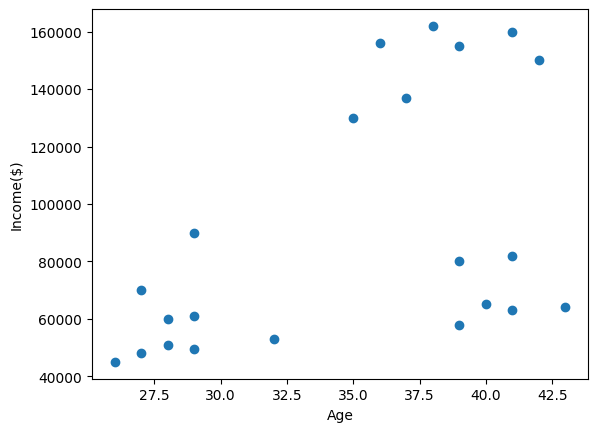

In [34]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [35]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [36]:
y_pred = km.fit_predict(df[['Age','Income($)']])
y_pred

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [37]:
df['cluster'] = y_pred

df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [38]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

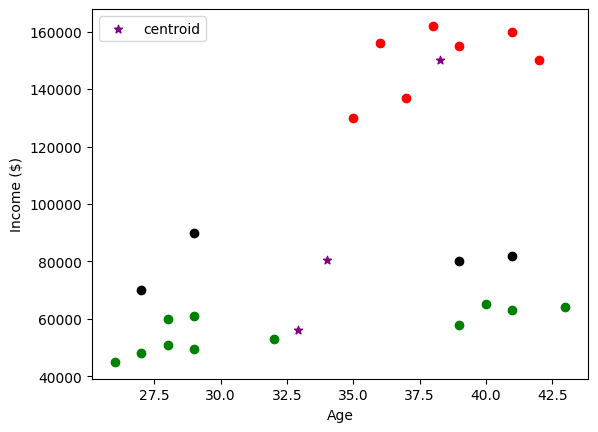

In [39]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

Preprocessing using min max scaler

In [40]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [41]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


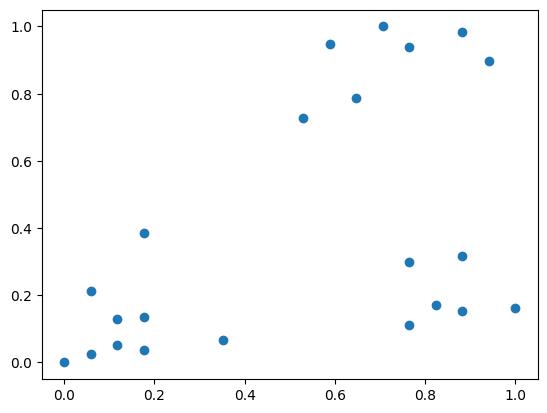

In [42]:
plt.scatter(df.Age,df['Income($)'])

In [43]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['Age','Income($)']])
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [44]:
df['cluster']=y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [45]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

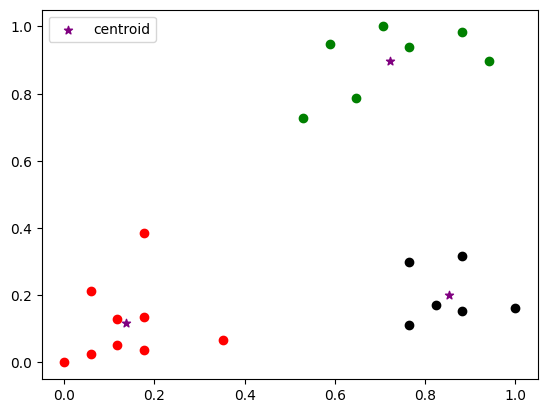

In [46]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

Elbow Plot

In [47]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

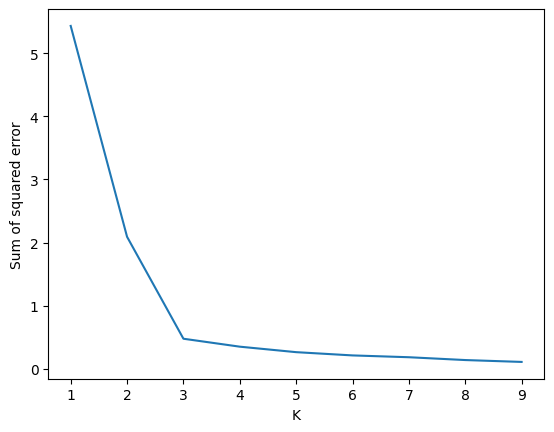

In [48]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

Clustering Algorithms

In [55]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load and preprocess data
df = pd.read_csv("income.csv")
scaler = MinMaxScaler()
df['Income($)'] = scaler.fit_transform(df[['Income($)']])
df['Age'] = scaler.fit_transform(df[['Age']])

# K-Means Clustering
km = KMeans(n_clusters=3)
df['cluster'] = km.fit_predict(df[['Age', 'Income($)']])

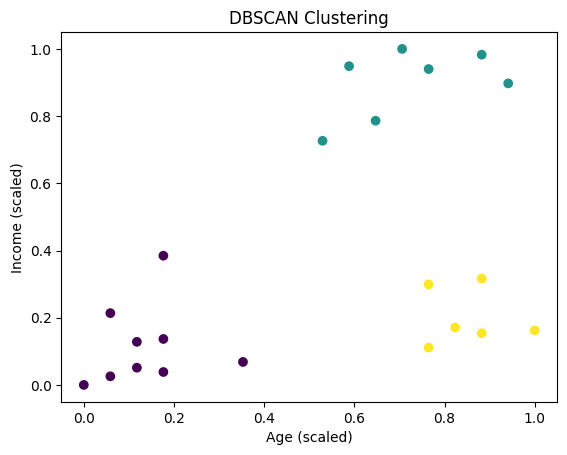

In [56]:
from sklearn.cluster import DBSCAN

# Create DBSCAN object
dbscan = DBSCAN(eps=0.3, min_samples=5)

# Fit and predict clusters
dbscan_labels = dbscan.fit_predict(df[['Age', 'Income($)']])

# Add to dataframe
df['DBSCAN_cluster'] = dbscan_labels

# Plot results
plt.scatter(df.Age, df['Income($)'], c=df.DBSCAN_cluster, cmap='viridis')
plt.xlabel('Age (scaled)')
plt.ylabel('Income (scaled)')
plt.title('DBSCAN Clustering')
plt.show()

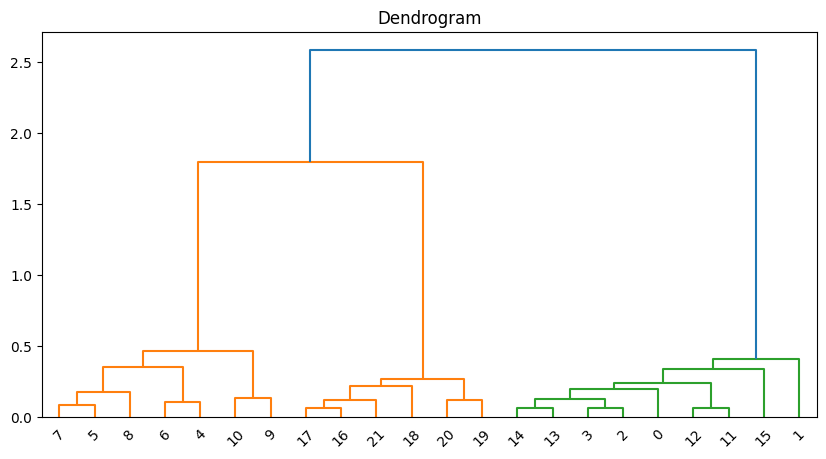

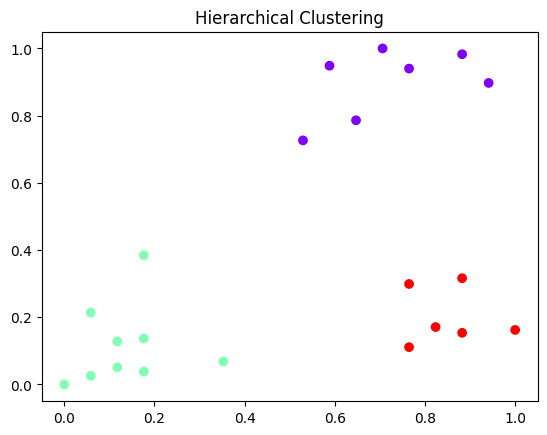

In [57]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Method 1: Using scikit-learn
agg = AgglomerativeClustering(n_clusters=3)
agg_labels = agg.fit_predict(df[['Age', 'Income($)']])
df['Hierarchical_cluster'] = agg_labels

# Method 2: Visualizing with dendrogram
linked = linkage(df[['Age', 'Income($)']], method='ward')

plt.figure(figsize=(10, 5))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram')
plt.show()

# Plot clusters
plt.scatter(df.Age, df['Income($)'], c=df.Hierarchical_cluster, cmap='rainbow')
plt.title('Hierarchical Clustering')
plt.show()

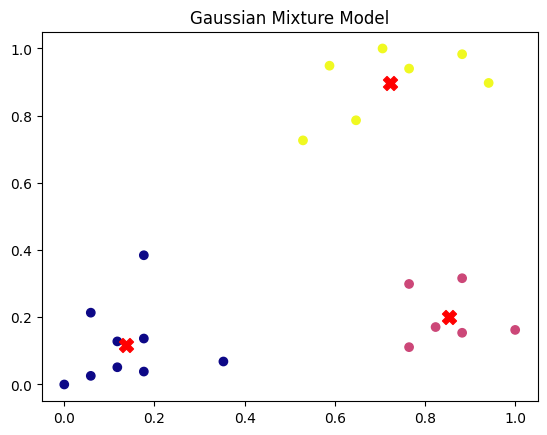

In [58]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3)
gmm_labels = gmm.fit_predict(df[['Age', 'Income($)']])
df['GMM_cluster'] = gmm_labels

# Plot results with cluster centers
plt.scatter(df.Age, df['Income($)'], c=gmm_labels, cmap='plasma')
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], s=100, marker='X', c='red')
plt.title('Gaussian Mixture Model')
plt.show()

In [59]:
df

,Name,Age,Income($),cluster,DBSCAN_cluster,Hierarchical_cluster,GMM_cluster
0,Rob,0.058824,0.213675,0,0,1,0
1,Michael,0.176471,0.384615,0,0,1,0
2,Mohan,0.176471,0.136752,0,0,1,0
3,Ismail,0.117647,0.128205,0,0,1,0
4,Kory,0.941176,0.897436,2,1,0,2
5,Gautam,0.764706,0.940171,2,1,0,2
6,David,0.882353,0.982906,2,1,0,2
7,Andrea,0.705882,1.000000,2,1,0,2
8,Brad,0.588235,0.948718,2,1,0,2
9,Angelina,0.529412,0.726496,2,1,0,2


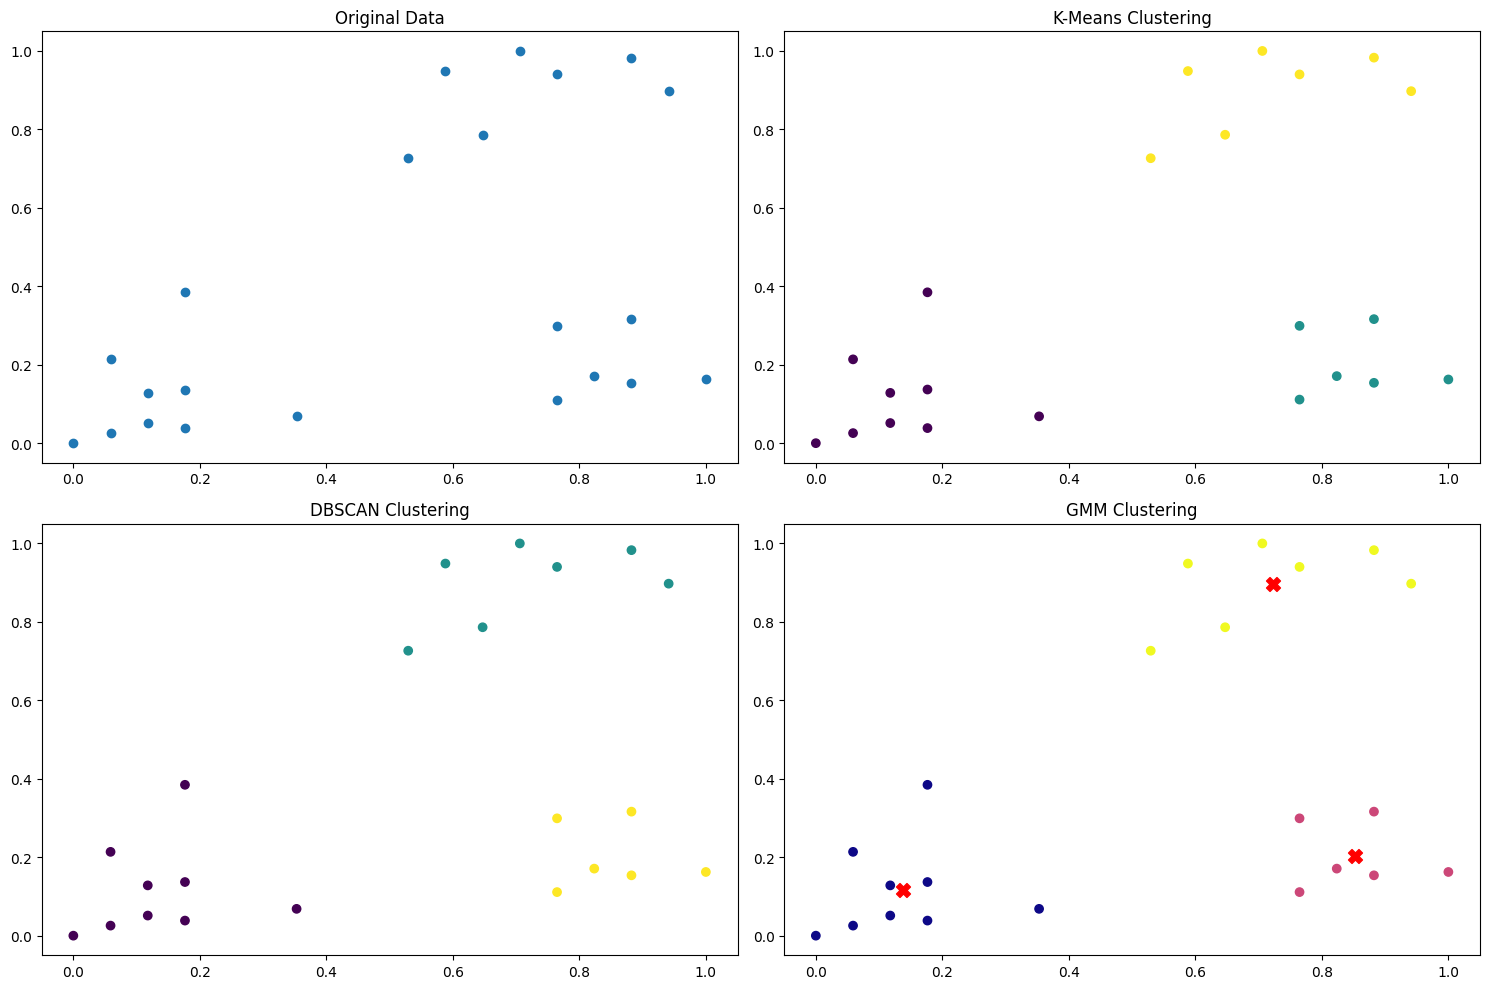

In [60]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Original Data
axs[0,0].scatter(df.Age, df['Income($)'])
axs[0,0].set_title('Original Data')

# K-Means
axs[0,1].scatter(df.Age, df['Income($)'], c=df['cluster'], cmap='viridis')
axs[0,1].set_title('K-Means Clustering')

# DBSCAN
axs[1,0].scatter(df.Age, df['Income($)'], c=df.DBSCAN_cluster, cmap='viridis')
axs[1,0].set_title('DBSCAN Clustering')

# GMM
axs[1,1].scatter(df.Age, df['Income($)'], c=df.GMM_cluster, cmap='plasma')
axs[1,1].scatter(gmm.means_[:,0], gmm.means_[:,1], s=100, marker='X', c='red')
axs[1,1].set_title('GMM Clustering')

plt.tight_layout()
plt.show()

Here’s a detailed comparison of the clustering methods (**K-Means**, **DBSCAN**, **Hierarchical Clustering**, and **Gaussian Mixture Models (GMM)** in both **tabular** and **Markdown** formats. This comparison highlights their key characteristics, advantages, disadvantages, and use cases.

---

### **Comparison Table**

| Feature/Aspect          | **K-Means**                          | **DBSCAN**                          | **Hierarchical Clustering**         | **Gaussian Mixture Models (GMM)**   |
|-------------------------|--------------------------------------|-------------------------------------|-------------------------------------|-------------------------------------|
| **Type of Clustering**  | Partition-based                     | Density-based                      | Hierarchical                       | Probabilistic                      |
| **Cluster Shape**       | Spherical (circular)                | Arbitrary (density-based)          | Arbitrary (depends on linkage)     | Elliptical (Gaussian distributions)|
| **Number of Clusters**  | Requires `k` (predefined)           | Automatically determined           | Can be determined via dendrogram   | Requires `k` (predefined)          |
| **Handles Noise**       | No                                  | Yes (identifies noise points)      | No                                 | No                                 |
| **Scalability**         | Scalable to large datasets          | Struggles with large datasets      | Struggles with large datasets      | Scalable to medium datasets        |
| **Complexity**          | Low                                 | Medium                             | High                               | Medium                             |
| **Output**              | Hard clustering (discrete labels)   | Hard clustering (discrete labels)  | Hard clustering (discrete labels)  | Soft clustering (probabilities)    |
| **Key Parameters**      | `n_clusters`                        | `eps`, `min_samples`               | `n_clusters`, linkage method       | `n_components`, covariance type    |
| **Advantages**          | Fast, simple, works well on spherical clusters | Handles noise, finds arbitrary shapes | No need to specify `k`, visual dendrogram | Soft clustering, flexible cluster shapes |
| **Disadvantages**       | Sensitive to initialization, assumes spherical clusters | Struggles with varying densities, requires tuning of `eps` and `min_samples` | Computationally expensive for large datasets, sensitive to noise | Slower than K-Means, assumes Gaussian distributions |
| **Use Cases**           | Customer segmentation, image compression | Anomaly detection, spatial data    | Biology (gene sequencing), taxonomy | Speech recognition, image segmentation |

---

### **Explanation**

#### **1. K-Means**
- **How it works**: Partitions data into `k` clusters by minimizing the within-cluster variance.
- **Strengths**:
  - Simple and fast.
  - Works well when clusters are spherical and well-separated.
- **Weaknesses**:
  - Requires predefined `k`.
  - Sensitive to initialization and outliers.
  - Assumes clusters are spherical.
- **Best for**: Datasets with clear, spherical clusters (e.g., customer segmentation).

---

#### **2. DBSCAN**
- **How it works**: Groups points that are closely packed together, marking points in low-density regions as outliers.
- **Strengths**:
  - Does not require predefined `k`.
  - Handles noise and outliers.
  - Can find arbitrarily shaped clusters.
- **Weaknesses**:
  - Struggles with clusters of varying densities.
  - Requires careful tuning of `eps` and `min_samples`.
- **Best for**: Anomaly detection, spatial data, and datasets with irregular cluster shapes.

---

#### **3. Hierarchical Clustering**
- **How it works**: Builds a hierarchy of clusters using a bottom-up (agglomerative) or top-down (divisive) approach.
- **Strengths**:
  - No need to specify `k` (can use dendrogram to determine clusters).
  - Provides a visual representation of cluster relationships.
- **Weaknesses**:
  - Computationally expensive for large datasets.
  - Sensitive to noise and outliers.
- **Best for**: Small datasets where hierarchical relationships are important (e.g., gene sequencing, taxonomy).

---

#### **4. Gaussian Mixture Models (GMM)**
- **How it works**: Assumes data is generated from a mixture of Gaussian distributions and assigns probabilities to cluster membership.
- **Strengths**:
  - Soft clustering (probabilistic assignments).
  - Can model elliptical clusters.
  - Flexible cluster shapes.
- **Weaknesses**:
  - Slower than K-Means.
  - Assumes data follows Gaussian distributions.
- **Best for**: Datasets where clusters overlap or have complex shapes (e.g., speech recognition, image segmentation).

---

### **When to Use Which Method?**
| **Scenario**                              | **Recommended Method**               |
|-------------------------------------------|--------------------------------------|
| Spherical, well-separated clusters        | K-Means                              |
| Irregularly shaped clusters               | DBSCAN                               |
| Hierarchical relationships in data        | Hierarchical Clustering              |
| Overlapping clusters or soft assignments  | Gaussian Mixture Models (GMM)       |
| Anomaly detection or noise handling       | DBSCAN                               |
| Large datasets                            | K-Means                              |
| Small datasets with hierarchical structure| Hierarchical Clustering              |

---

### **Summary**
- **K-Means**: Best for simple, spherical clusters and large datasets.
- **DBSCAN**: Best for irregular shapes and noise handling.
- **Hierarchical Clustering**: Best for small datasets with hierarchical relationships.
- **GMM**: Best for overlapping clusters and probabilistic assignments.


Evaluating clustering algorithms is crucial to determine how well the clusters are formed. Unlike supervised learning, clustering evaluation is more challenging because there are no ground truth labels. However, there are several metrics and techniques to evaluate clustering performance. Below is a detailed explanation of evaluation metrics for clustering algorithms:

---

### **1. Metrics for Clustering Evaluation**

#### **A. Metrics When Ground Truth Labels Are Available**
If you have true labels for the data, you can use the following metrics:

| Metric                  | Description                                                                 | Formula/Explanation                                                                 |
|-------------------------|-----------------------------------------------------------------------------|-------------------------------------------------------------------------------------|
| **Adjusted Rand Index (ARI)** | Measures the similarity between true and predicted clusters, adjusted for chance. | \( \text{ARI} = \frac{\text{RI} - \text{Expected RI}}{\max(\text{RI}) - \text{Expected RI}} \) |
| **Normalized Mutual Information (NMI)** | Measures the mutual information between true and predicted clusters, normalized. | \( \text{NMI} = \frac{2 \cdot I(Y, C)}{H(Y) + H(C)}} \)                            |
| **Fowlkes-Mallows Index (FMI)** | Geometric mean of precision and recall for pairwise cluster assignments.     | \( \text{FMI} = \frac{\text{TP}}{\sqrt{(\text{TP} + \text{FP}) \cdot (\text{TP} + \text{FN})}} \) |
| **Homogeneity, Completeness, V-Measure** | Measures how well clusters match true labels (homogeneity) and how well true labels are grouped into clusters (completeness). V-Measure is their harmonic mean. | \( \text{V-Measure} = \frac{2 \cdot \text{homo} \cdot \text{comp}}{\text{homo} + \text{comp}} \) |

---

#### **B. Metrics When Ground Truth Labels Are Not Available**
If true labels are not available, you can use intrinsic metrics based on the data and clustering results:

| Metric                  | Description                                                                 | Formula/Explanation                                                                 |
|-------------------------|-----------------------------------------------------------------------------|-------------------------------------------------------------------------------------|
| **Silhouette Score**    | Measures how similar an object is to its own cluster compared to other clusters. Ranges from -1 to 1. | \( s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))} \)                                |
| **Calinski-Harabasz Index** | Ratio of between-cluster dispersion to within-cluster dispersion. Higher values indicate better clustering. | \( \text{CH} = \frac{\text{tr}(B_k)}{\text{tr}(W_k)} \cdot \frac{N - k}{k - 1} \) |
| **Davies-Bouldin Index** | Average similarity ratio of within-cluster scatter to between-cluster separation. Lower values indicate better clustering. | \( \text{DB} = \frac{1}{k} \sum_{i=1}^k \max_{j \neq i} \left( \frac{s_i + s_j}{d(c_i, c_j)} \right) \) |
| **Dunn Index**          | Ratio of the smallest inter-cluster distance to the largest intra-cluster distance. Higher values indicate better clustering. | \( \text{Dunn} = \frac{\min_{1 \leq i < j \leq n} d(i, j)}{\max_{1 \leq k \leq n} \Delta_k} \) |

---

### **2. Evaluation Metrics for Specific Clustering Algorithms**

#### **A. K-Means**
- **Silhouette Score**: Useful for determining the optimal number of clusters (`k`).
- **Inertia (Within-Cluster Sum of Squares)**: Measures how tightly the clusters are formed. Lower inertia is better.
- **Elbow Method**: Plot inertia vs. `k` and look for the "elbow" point to determine the optimal `k`.

#### **B. DBSCAN**
- **Silhouette Score**: Evaluates the quality of clusters, especially when clusters have arbitrary shapes.
- **Number of Noise Points**: A good DBSCAN model should have a reasonable number of noise points (not too many or too few).
- **Cluster Stability**: Check if clusters remain stable when varying `eps` and `min_samples`.

#### **C. Hierarchical Clustering**
- **Cophenetic Correlation Coefficient**: Measures how well the dendrogram preserves the pairwise distances between data points. Closer to 1 is better.
- **Dendrogram Analysis**: Visually inspect the dendrogram to determine the optimal number of clusters.

#### **D. Gaussian Mixture Models (GMM)**
- **Bayesian Information Criterion (BIC)**: Used to select the optimal number of components (`k`). Lower BIC is better.
- **Akaike Information Criterion (AIC)**: Similar to BIC but penalizes complexity less. Lower AIC is better.
- **Log-Likelihood**: Higher log-likelihood indicates a better fit.

### **3. Summary of Metrics**

| **Metric**               | **Best For**                                                                 | **Range**           | **Higher/Lower Better** |
|--------------------------|-----------------------------------------------------------------------------|---------------------|--------------------------|
| **Silhouette Score**      | General-purpose clustering evaluation                                       | [-1, 1]             | Higher                  |
| **Calinski-Harabasz**     | Balanced, well-separated clusters                                           | [0, ∞)              | Higher                  |
| **Davies-Bouldin**        | Compact and well-separated clusters                                         | [0, ∞)              | Lower                   |
| **Adjusted Rand Index**   | Comparing clustering results to ground truth                                | [-1, 1]             | Higher                  |
| **Normalized Mutual Info**| Comparing clustering results to ground truth                                | [0, 1]              | Higher                  |
| **Cophenetic Correlation**| Hierarchical clustering evaluation                                          | [0, 1]              | Higher                  |
| **BIC/AIC**               | Model selection for GMM                                                    | (-∞, ∞)             | Lower                   |

---

### **4. Recommendations**
- Use **Silhouette Score** and **Elbow Method** for K-Means.
- Use **Silhouette Score** and **Noise Point Analysis** for DBSCAN.
- Use **Cophenetic Correlation** and **Dendrogram Analysis** for Hierarchical Clustering.
- Use **BIC/AIC** and **Log-Likelihood** for GMM.

In [62]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load dataset
df = pd.read_csv("income.csv")

# Preprocess data
scaler = MinMaxScaler()
df['Income($)'] = scaler.fit_transform(df[['Income($)']])
df['Age'] = scaler.fit_transform(df[['Age']])

# Features for clustering
X = df[['Age', 'Income($)']]

In [63]:
from sklearn.cluster import KMeans

# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
df['kmeans_cluster'] = kmeans_labels

In [64]:
from sklearn.cluster import AgglomerativeClustering

# Hierarchical clustering
agg = AgglomerativeClustering(n_clusters=3)
agg_labels = agg.fit_predict(X)
df['agg_cluster'] = agg_labels

In [65]:
from sklearn.mixture import GaussianMixture

# GMM clustering
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X)
df['gmm_cluster'] = gmm_labels

In [68]:
df

,Name,Age,Income($),kmeans_cluster,agg_cluster,gmm_cluster
0,Rob,0.058824,0.213675,1,1,1
1,Michael,0.176471,0.384615,1,1,1
2,Mohan,0.176471,0.136752,1,1,1
3,Ismail,0.117647,0.128205,1,1,1
4,Kory,0.941176,0.897436,0,0,0
5,Gautam,0.764706,0.940171,0,0,0
6,David,0.882353,0.982906,0,0,0
7,Andrea,0.705882,1.000000,0,0,0
8,Brad,0.588235,0.948718,0,0,0
9,Angelina,0.529412,0.726496,0,0,0


In [66]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Function to evaluate clustering
def evaluate_clustering(X, labels, algorithm_name):
    silhouette = silhouette_score(X, labels)
    calinski = calinski_harabasz_score(X, labels)
    davies = davies_bouldin_score(X, labels)
    
    print(f"Metrics for {algorithm_name}:")
    print(f"  Silhouette Score: {silhouette:.4f}")
    print(f"  Calinski-Harabasz Index: {calinski:.4f}")
    print(f"  Davies-Bouldin Index: {davies:.4f}")
    print()

# Evaluate all algorithms
evaluate_clustering(X, kmeans_labels, "K-Means")
evaluate_clustering(X, dbscan_labels, "DBSCAN")
evaluate_clustering(X, agg_labels, "Hierarchical Clustering")
evaluate_clustering(X, gmm_labels, "Gaussian Mixture Models")

Metrics for K-Means:
  Silhouette Score: 0.7130
  Calinski-Harabasz Index: 99.1623
  Davies-Bouldin Index: 0.3536

Metrics for DBSCAN:
  Silhouette Score: 0.7130
  Calinski-Harabasz Index: 99.1623
  Davies-Bouldin Index: 0.3536

Metrics for Hierarchical Clustering:
  Silhouette Score: 0.7130
  Calinski-Harabasz Index: 99.1623
  Davies-Bouldin Index: 0.3536

Metrics for Gaussian Mixture Models:
  Silhouette Score: 0.7130
  Calinski-Harabasz Index: 99.1623
  Davies-Bouldin Index: 0.3536



In [69]:
df

,Name,Age,Income($),kmeans_cluster,agg_cluster,gmm_cluster
0,Rob,0.058824,0.213675,1,1,1
1,Michael,0.176471,0.384615,1,1,1
2,Mohan,0.176471,0.136752,1,1,1
3,Ismail,0.117647,0.128205,1,1,1
4,Kory,0.941176,0.897436,0,0,0
5,Gautam,0.764706,0.940171,0,0,0
6,David,0.882353,0.982906,0,0,0
7,Andrea,0.705882,1.000000,0,0,0
8,Brad,0.588235,0.948718,0,0,0
9,Angelina,0.529412,0.726496,0,0,0


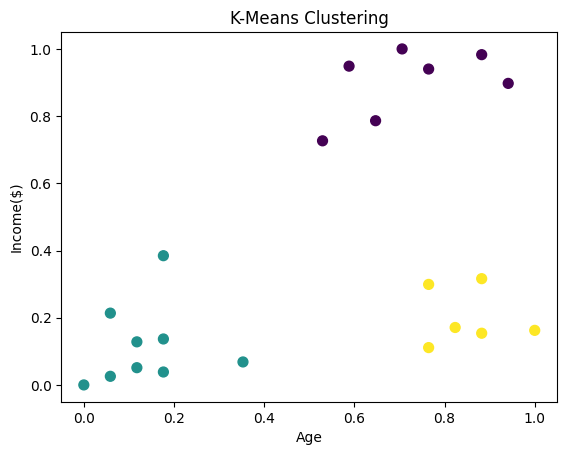

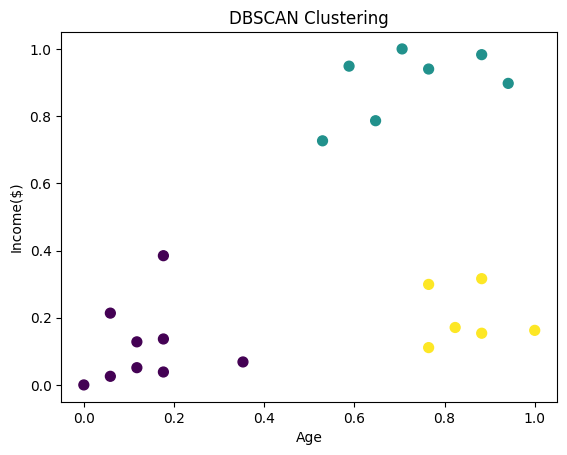

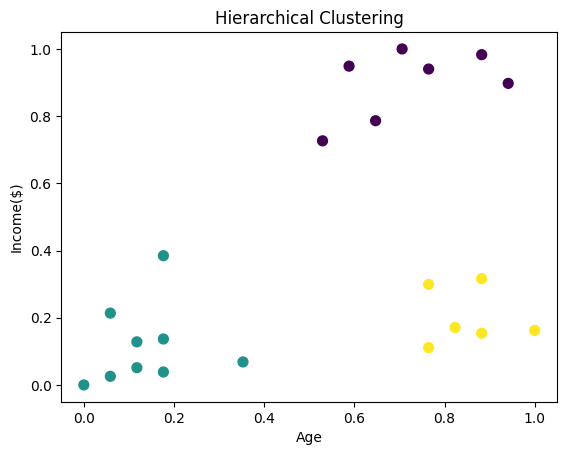

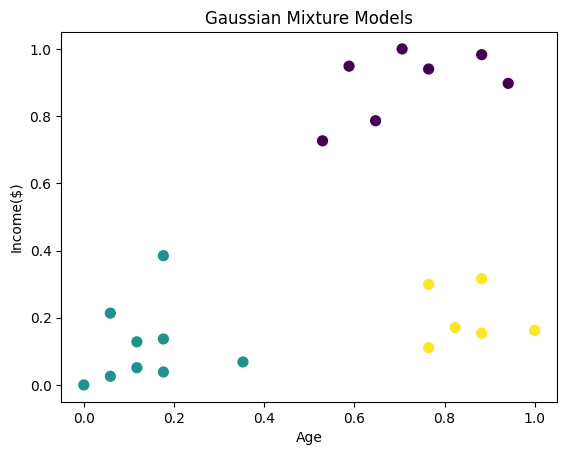

In [70]:
import matplotlib.pyplot as plt

# Plot clusters
def plot_clusters(X, labels, title):
    plt.scatter(X['Age'], X['Income($)'], c=labels, cmap='viridis', s=50)
    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('Income($)')
    plt.show()

# Plot for each algorithm
plot_clusters(X, kmeans_labels, "K-Means Clustering")
plot_clusters(X, dbscan_labels, "DBSCAN Clustering")
plot_clusters(X, agg_labels, "Hierarchical Clustering")
plot_clusters(X, gmm_labels, "Gaussian Mixture Models")